# Import Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import graphviz
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score

C:\Users\Noor Alam\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

In [4]:
data.shape

(45211, 17)

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

10 features have object type, 7 are numbers

as per given data we know that 10 features are of category type, so lets convert the as a category type

In [6]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [7]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [8]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


### Check Missing value

In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

### Five point summary

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


outliers are present in age,balance,duration,campaign,pdays,previous

### Distribution of numerical columns

C:\Users\Noor Alam\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


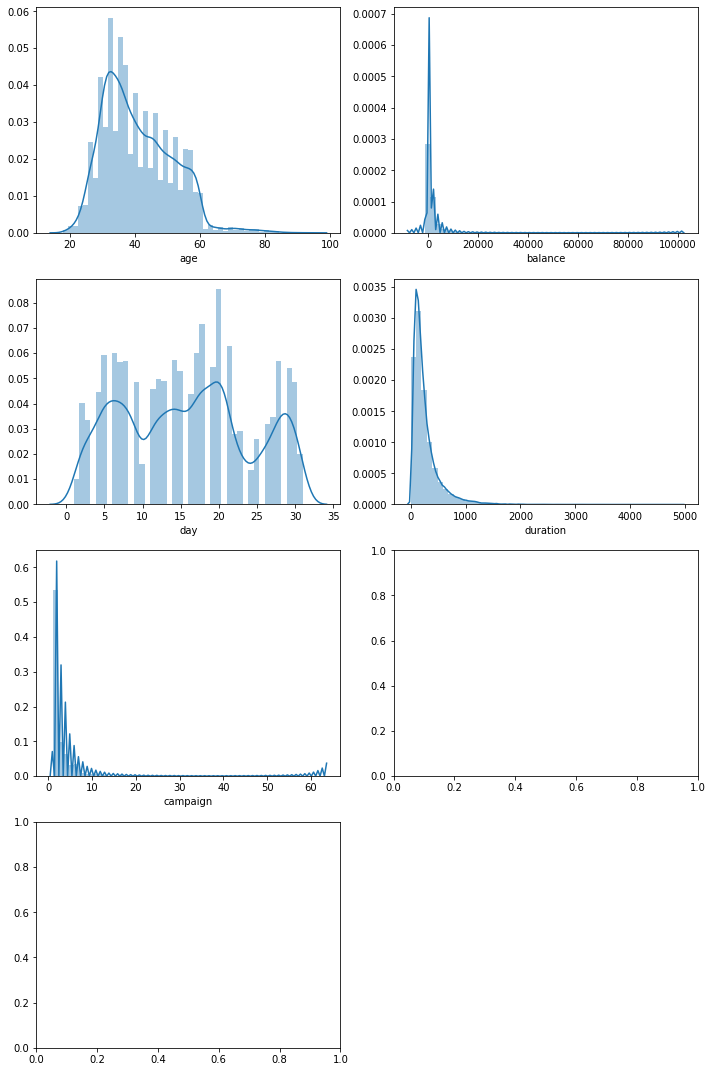

In [16]:
fig , axe = plt.subplots( nrows=4, ncols=2, figsize = (10, 15))
axe = axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
#sns.distplot(data['pdays'],ax=axe[5])
#sns.distplot(data['previous'],ax=axe[5])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [17]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


### Distribution of categorical features

C:\Users\Noor Alam\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


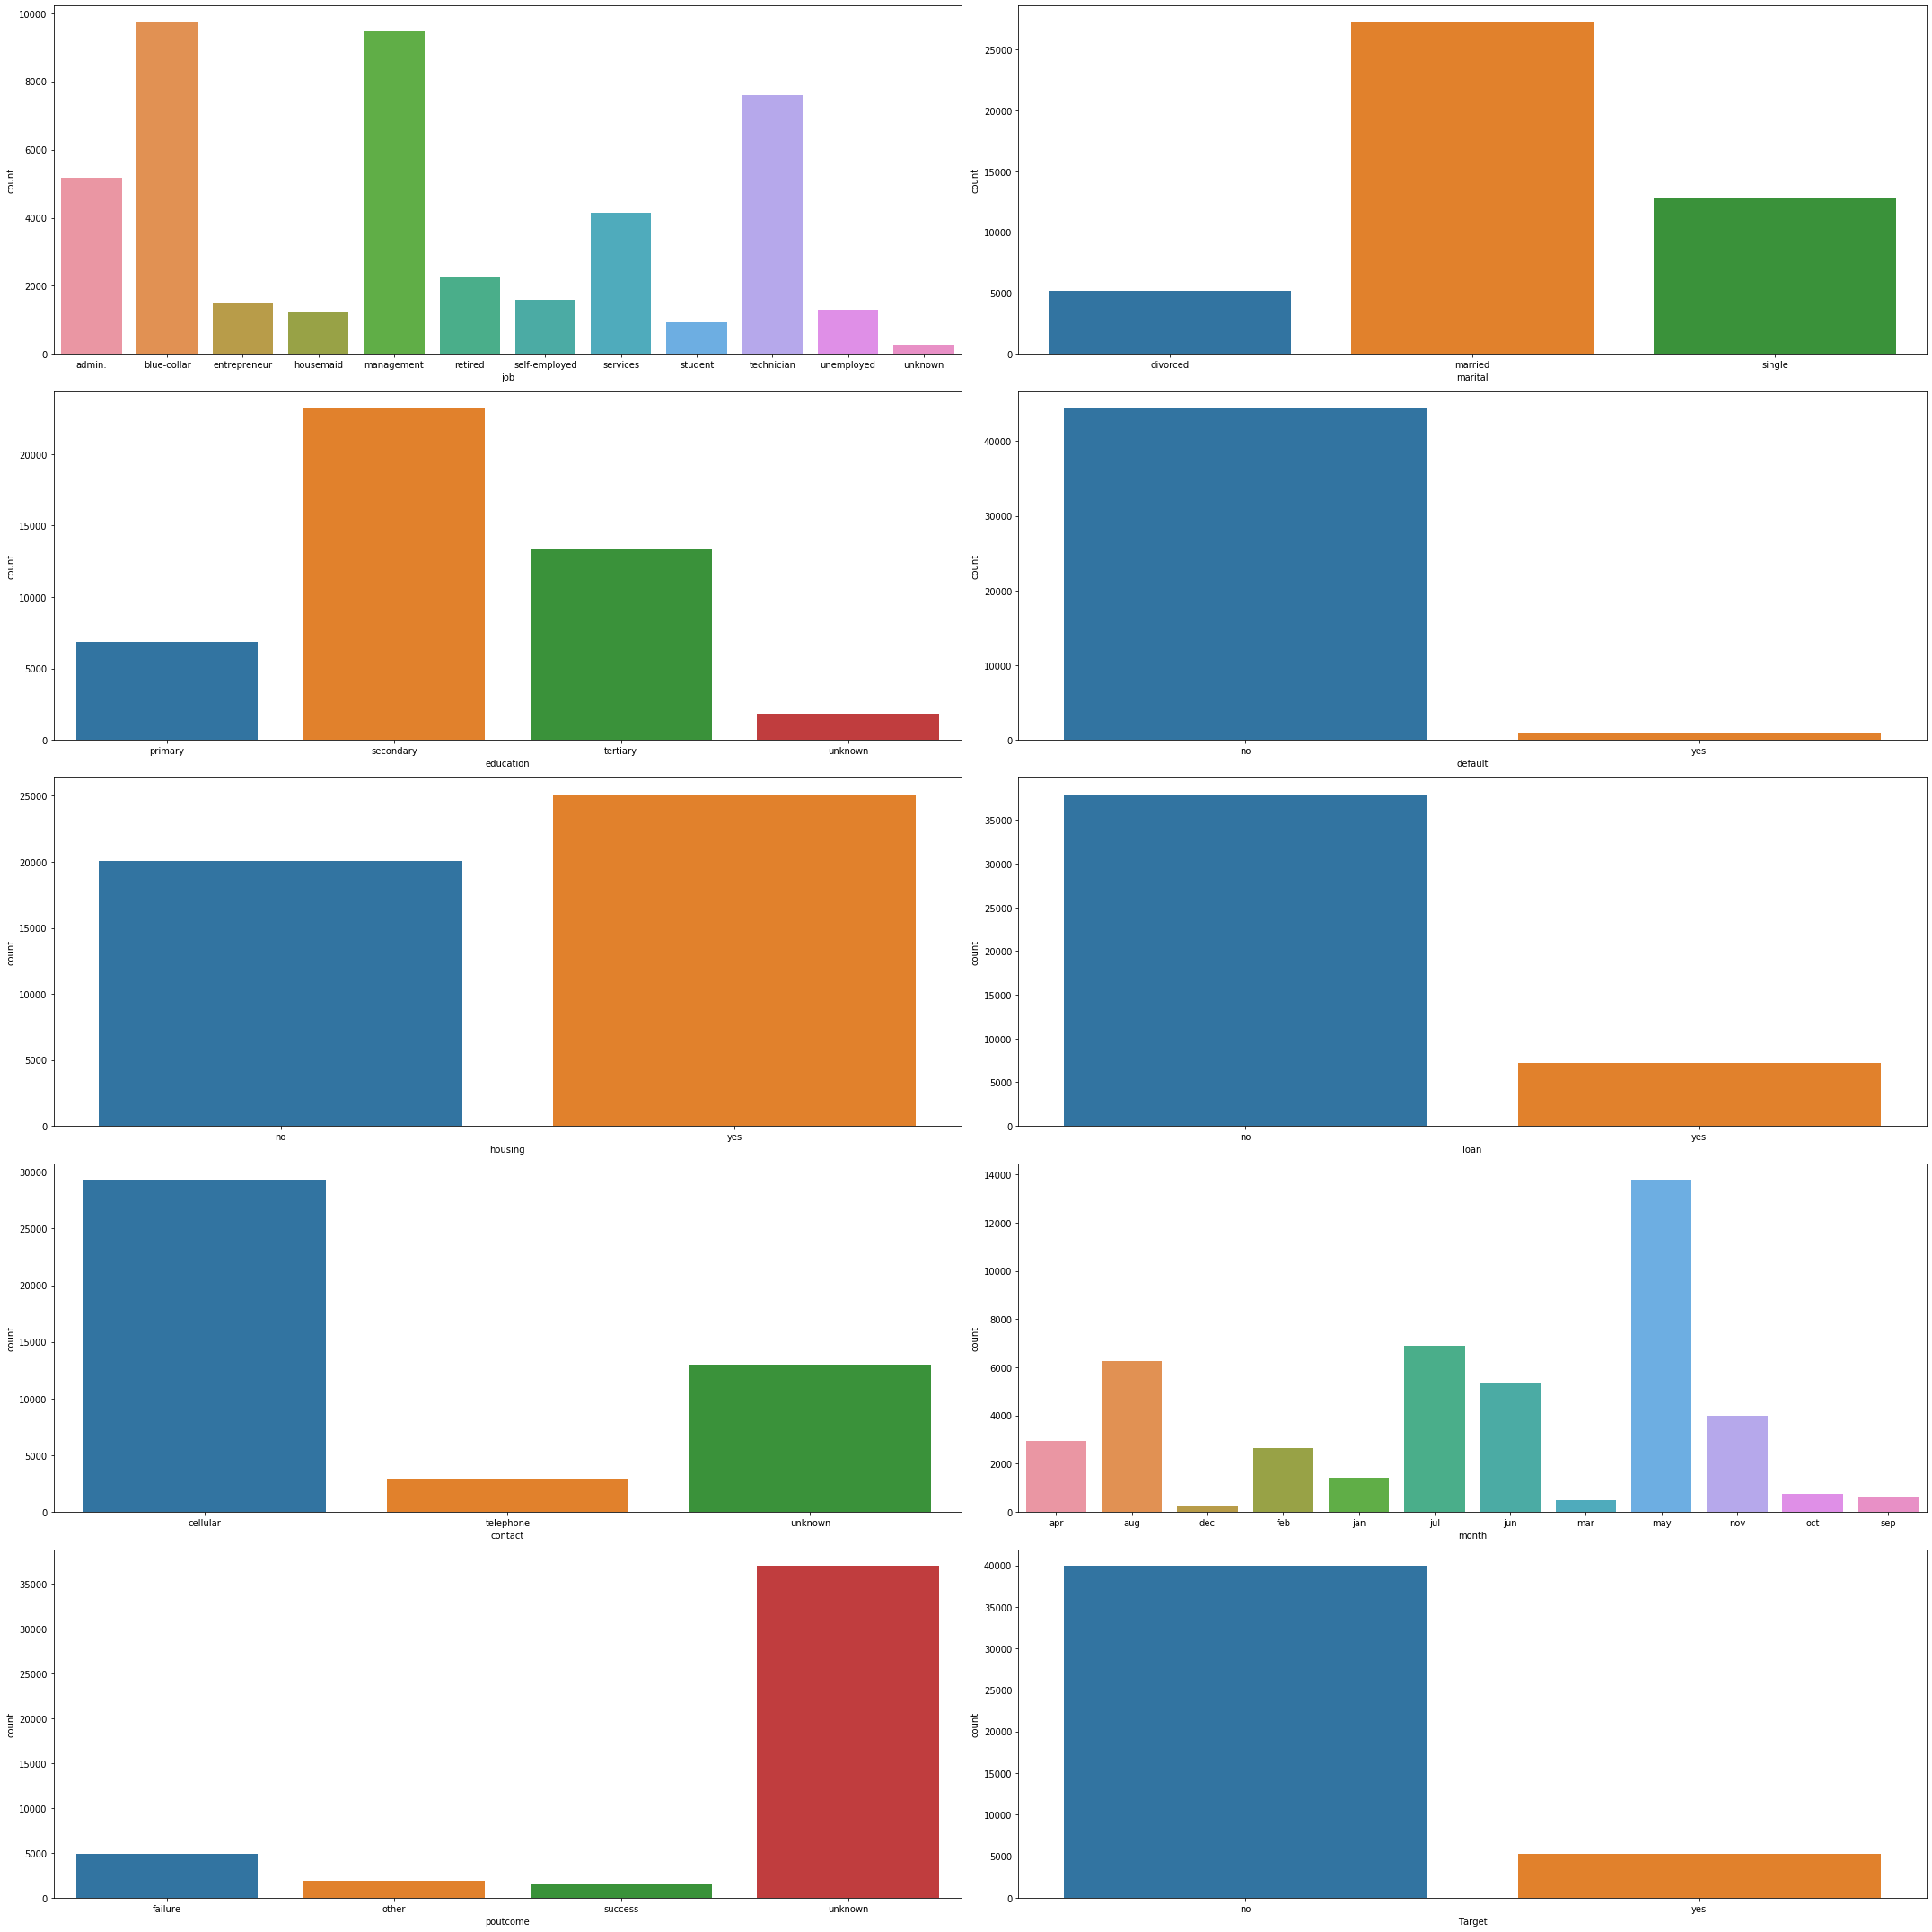

In [18]:
fig , axe = plt.subplots( nrows=5, ncols=2, figsize = (30, 30))
axe = axe.flatten()

plot = sns.countplot(x = data['job'], data= data , ax=axe[0])
#plt.set(plt.get_xticklabels(),rotation = 90)
plot = sns.countplot(x = data['marital'], data= data , ax=axe[1])
plot = sns.countplot(x = data['education'], data= data , ax=axe[2])
plot = sns.countplot(x = data['default'], data= data , ax=axe[3])
plot = sns.countplot(x = data['housing'], data= data , ax=axe[4])
plot = sns.countplot(x = data['loan'], data= data , ax=axe[5])
plot = sns.countplot(x = data['contact'], data= data , ax=axe[6])
plot = sns.countplot(x = data['month'], data= data , ax=axe[7])
plot = sns.countplot(x = data['poutcome'], data= data , ax=axe[8])
plot = sns.countplot(x = data['Target'], data= data , ax=axe[9])

fig.tight_layout()
fig.show()


### Inference from the count plot of categorical feature

more than 90% outcome have no default credit

88% customer have not subscribed for term deposite

most customers have been contacted in may march

most of the customer have been contacted by celluler network

number of customers who have housing loan is more then the number of customer who dont have housing loan

around 6% customers have credit in default

### Measure of Skewness of numerical features

In [19]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


### Checking presence of outliers

C:\Users\Noor Alam\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


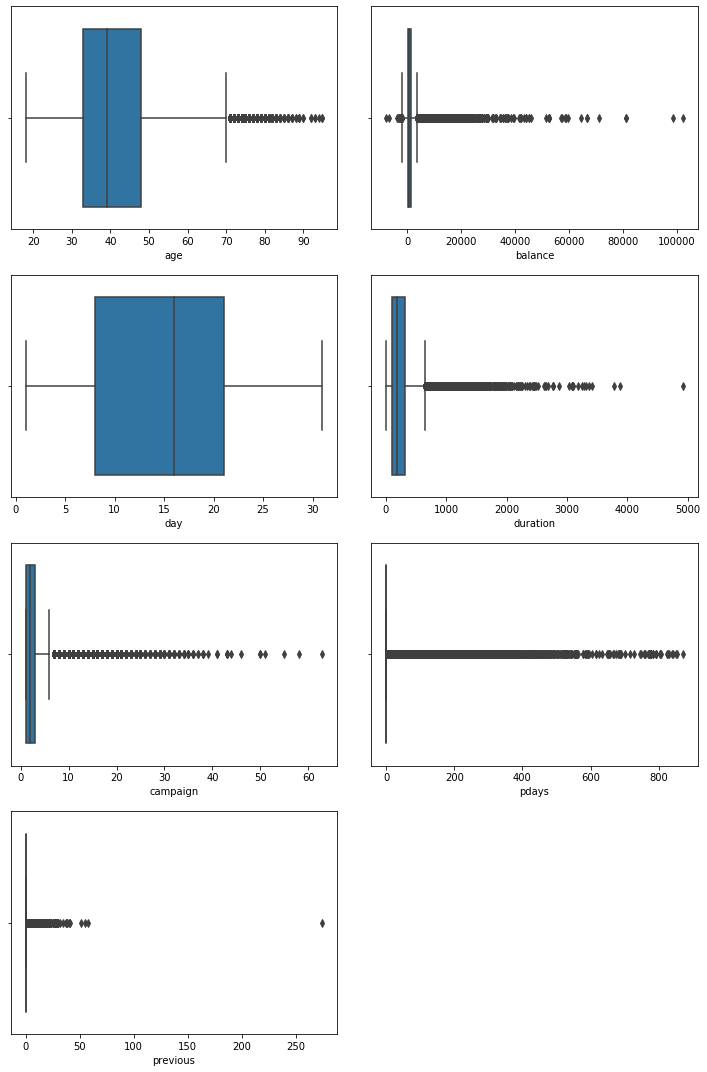

In [20]:
fig , axe = plt.subplots( nrows=4, ncols=2, figsize = (10, 15))
axe = axe.flatten()

sns.boxplot(x = 'age', data= data , ax=axe[0])
sns.boxplot(x = 'balance', data= data , ax=axe[1])
sns.boxplot(x = 'day', data= data , ax=axe[2])
sns.boxplot(x = 'duration', data= data , ax=axe[3])
sns.boxplot(x = 'campaign', data= data , ax=axe[4])
sns.boxplot(x = 'pdays', data= data , ax=axe[5])
sns.boxplot(x = 'previous', data= data , ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [21]:
data['Target'].value_counts().to_frame('Target feature distribution')

,Target feature distribution
no,39922
yes,5289


In [22]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


# Data Pre-processing

### Label Encoder

In [23]:
df = data.copy()
encoder = LabelEncoder()
df['default'] = encoder.fit_transform(df['default']).astype(int)
df['marital'] = encoder.fit_transform(df['marital']).astype(int)
df['loan'] = encoder.fit_transform(df['loan']).astype(int)
df['housing'] = encoder.fit_transform(df['housing']).astype(int)
df['Target'] = encoder.fit_transform(df['Target']).astype(int)
df['month'] = encoder.fit_transform(df['month']).astype(int)
df['poutcome'] = encoder.fit_transform(df['poutcome']).astype(int)
df['education'] = encoder.fit_transform(df['education']).astype(int)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [24]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [25]:
df.info

<bound method DataFrame.info of        age           job marital education default  balance housing loan  \
0       58    management       1         2       0     2143       1    0   
1       44    technician       2         1       0       29       1    0   
2       33  entrepreneur       1         1       0        2       1    1   
3       47   blue-collar       1         3       0     1506       1    0   
4       33       unknown       2         3       0        1       0    0   
...    ...           ...     ...       ...     ...      ...     ...  ...   
45206   51    technician       1         2       0      825       0    0   
45207   71       retired       0         0       0     1729       0    0   
45208   72       retired       1         1       0     5715       0    0   
45209   57   blue-collar       1         1       0      668       0    0   
45210   37  entrepreneur       1         1       0     2971       0    0   

         contact  day month  duration  campaign  pdays 

### Handling outliear with mean replacement

In [26]:
meanbal = float(df['balance'].mean())
df['balance'] = np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])

In [27]:
meandur = float(df['duration'].mean())
df['duration'] = np.where(df['duration']>np.percentile(df['duration'],75),meanbal,df['duration'])

In [28]:
meancam = float(df['campaign'].mean())
df['campaign'] = np.where(df['campaign']>np.percentile(df['campaign'],75),meanbal,df['campaign'])

In [29]:
meanpd = float(df['pdays'].mean())
df['pdays'] = np.where(df['pdays']>np.percentile(df['pdays'],75),meanbal,df['pdays'])

In [30]:
meanpr = float(df['previous'].mean())
df['previous'] = np.where(df['previous']>np.percentile(df['previous'],75),meanbal,df['previous'])

After Removing Outlires

C:\Users\Noor Alam\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


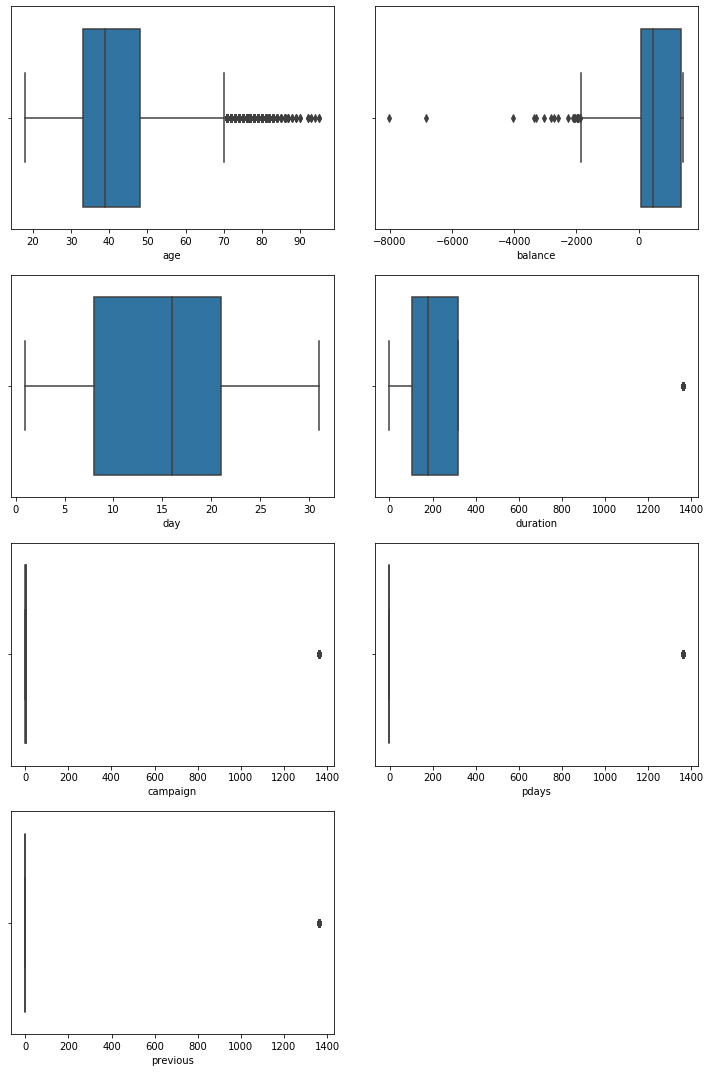

In [31]:
fig , axe = plt.subplots( nrows=4, ncols=2, figsize = (10, 15))
axe = axe.flatten()

sns.boxplot(x = 'age', data= df , ax=axe[0])
sns.boxplot(x = 'balance', data= df , ax=axe[1])
sns.boxplot(x = 'day', data= df , ax=axe[2])
sns.boxplot(x = 'duration', data= df , ax=axe[3])
sns.boxplot(x = 'campaign', data= df , ax=axe[4])
sns.boxplot(x = 'pdays', data= df , ax=axe[5])
sns.boxplot(x = 'previous', data= df , ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

### Correlation plot of all features

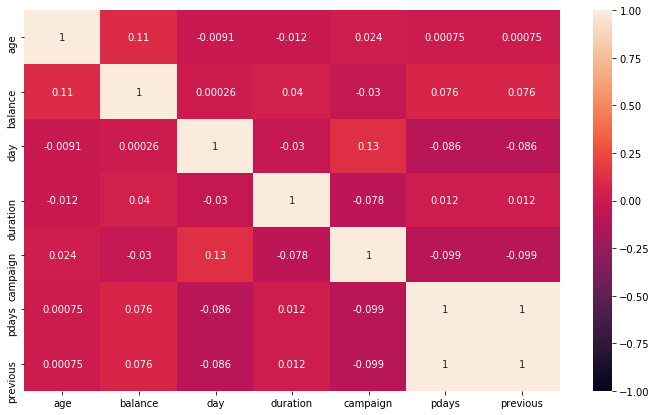

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

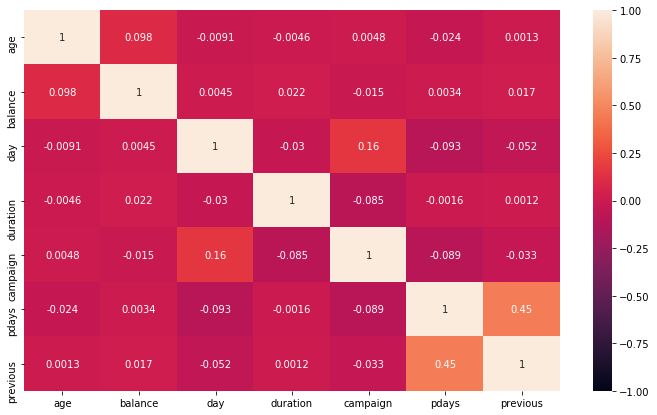

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

In [34]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0


### Remove Columns

In [35]:
df2 = df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


### Pairplot of the features

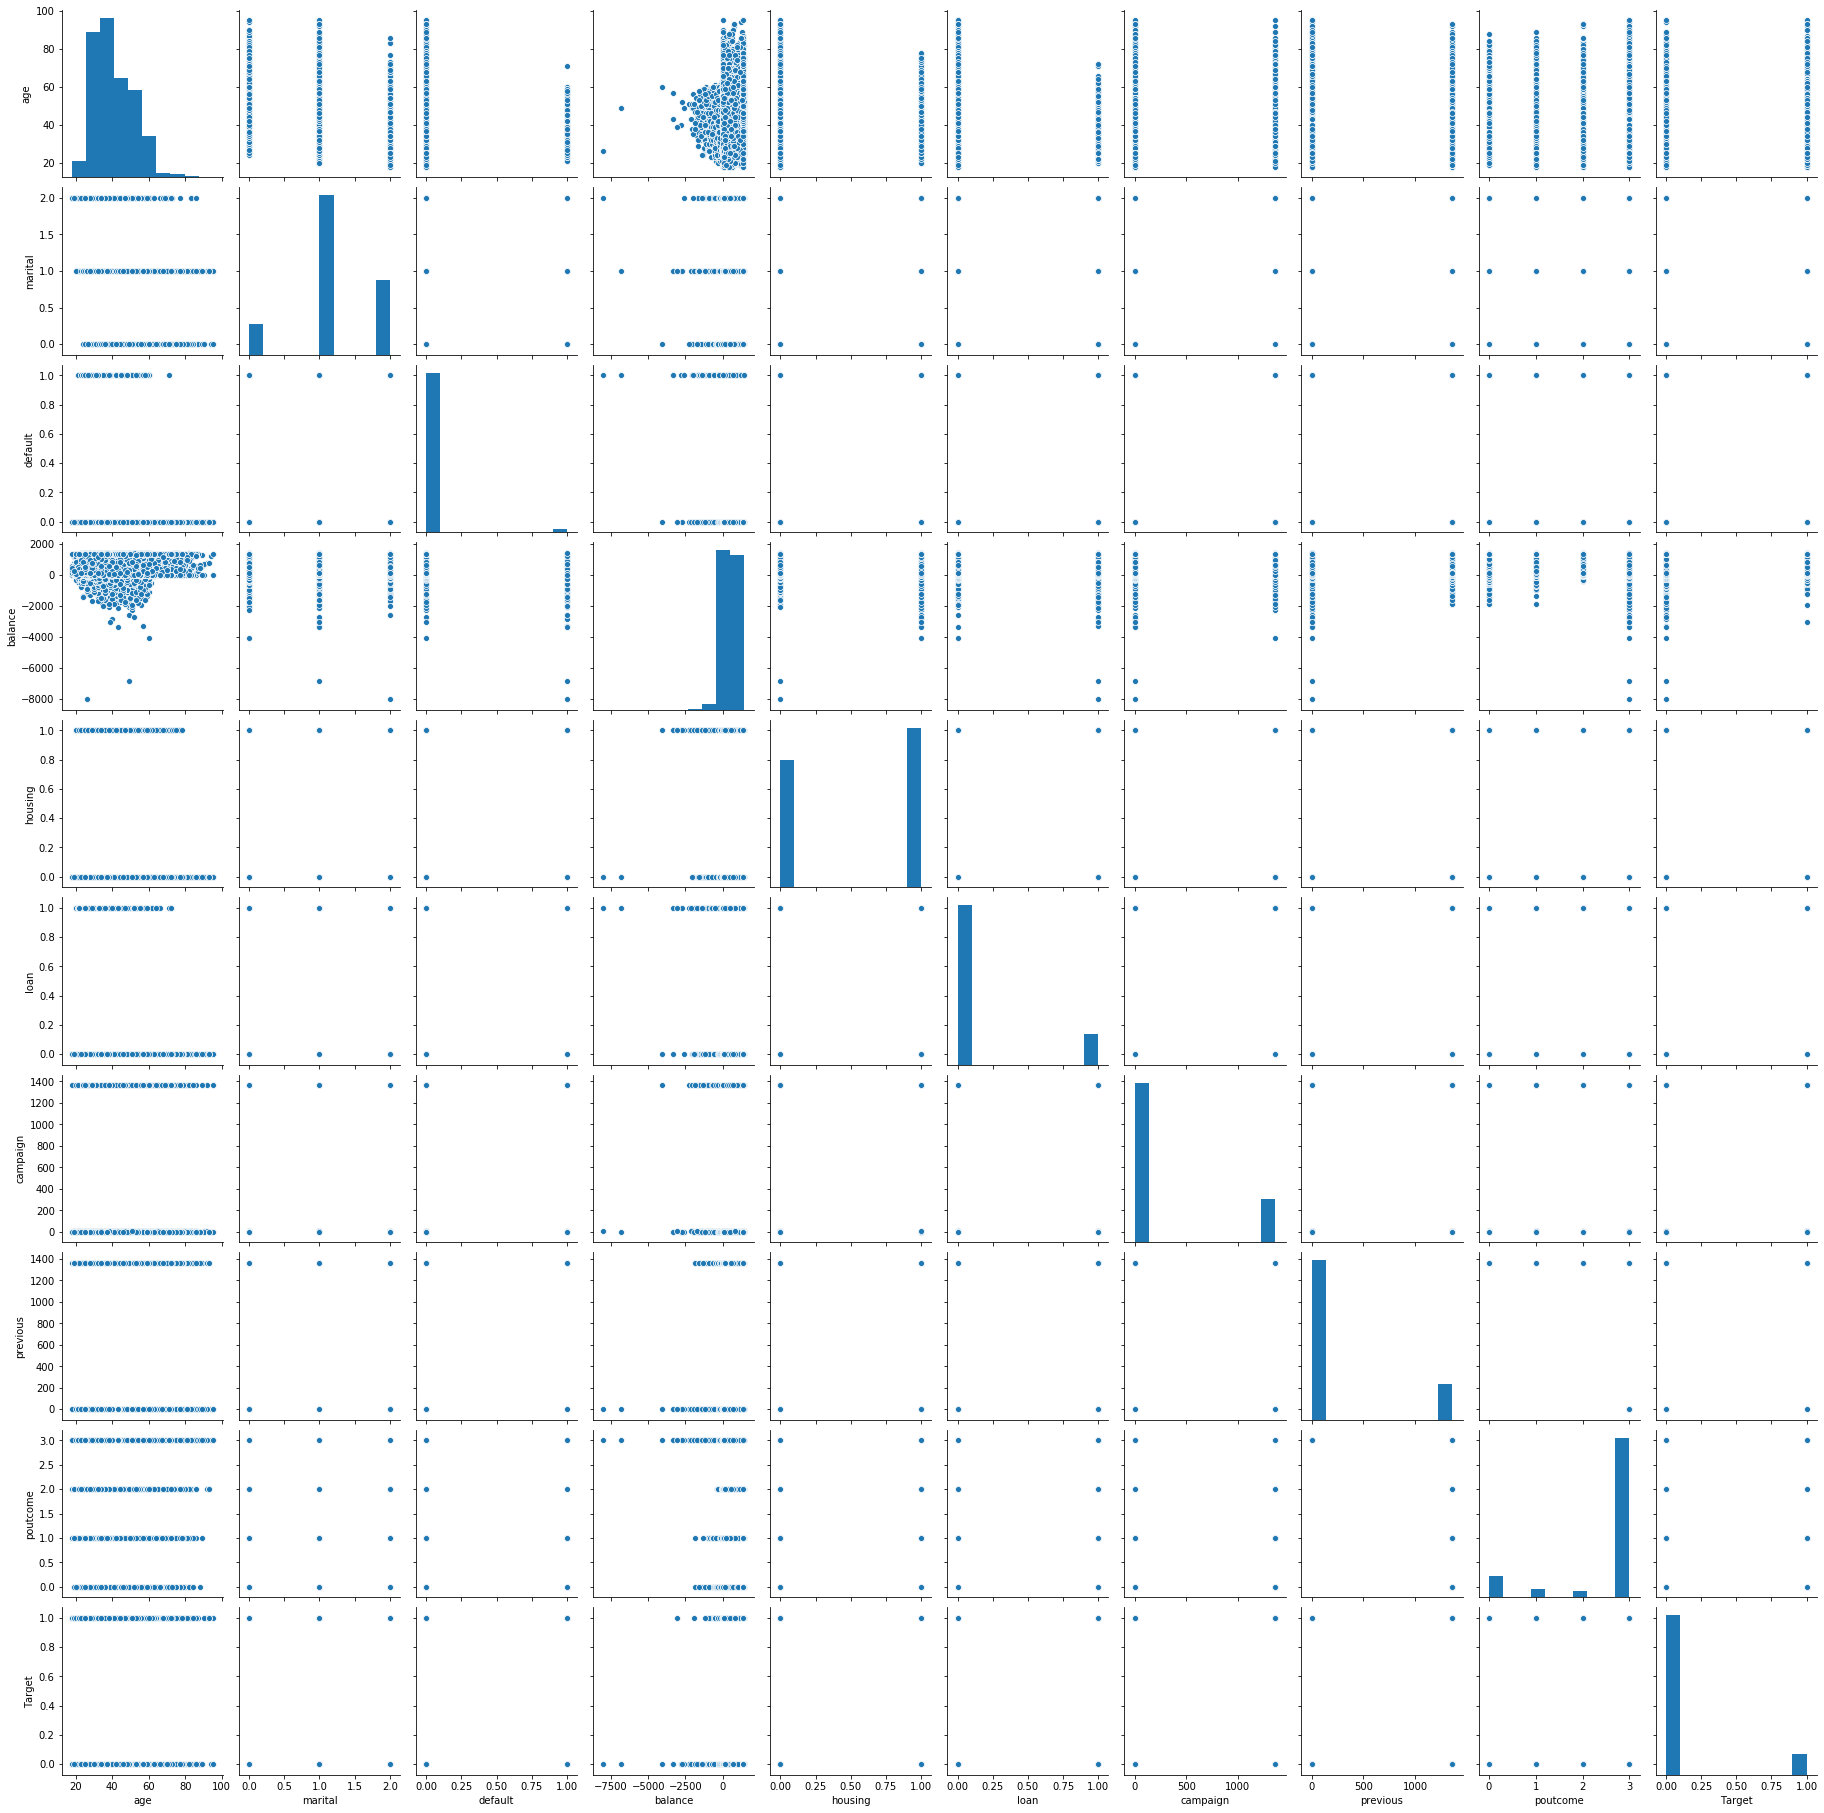

In [36]:
sns.pairplot(df2)

# Split data for training and testing (70:30)

In [37]:
x = df2.drop('Target',axis=1)
y = df2['Target']

In [38]:
x.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3
1,44,2,0,29.000000,1,0,1.0,0.0,3
2,33,1,0,2.000000,1,1,1.0,0.0,3
3,47,1,0,1362.272058,1,0,1.0,0.0,3
4,33,2,0,1.000000,0,0,1.0,0.0,3


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3,random_state=2)

## Scalling the data

In [41]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

# Model
## 1. Logistic Regression

In [42]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scaled,ytrain)
y_pred = logic_r.predict(xtest_scaled)
LR_accuracy = accuracy_score(ytest,y_pred)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,y_pred))
print('\n Accuracy score \n', LR_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,y_pred))


 Confusion matrix 

 [[11897   102]
 [ 1316   249]]

 Accuracy score 
 89.54585667944559

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.71      0.16      0.26      1565

    accuracy                           0.90     13564
   macro avg       0.80      0.58      0.60     13564
weighted avg       0.88      0.90      0.86     13564



## 2. Navie Bayes

In [43]:
NB = GaussianNB()
NB.fit(xtrain_scaled,ytrain)
y_predi = NB.predict(xtest_scaled)
NB_accuracy = accuracy_score(ytest,y_predi)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,y_predi))
print('\n Accuracy score \n', NB_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,y_predi))


 Confusion matrix 

 [[10627  1372]
 [ 1043   522]]

 Accuracy score 
 82.19551754644647

 Classification Report 

               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



## 3. KNN 

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_scaled,ytrain)
y_predict = knn.predict(xtest_scaled)
KNN_accuracy = accuracy_score(ytest,y_predict)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,y_predict))
print('\n Accuracy score \n', KNN_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,y_predict))


 Confusion matrix 

 [[11488   511]
 [ 1231   334]]

 Accuracy score 
 87.15718077263345

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.40      0.21      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.65      0.59      0.60     13564
weighted avg       0.84      0.87      0.85     13564



## 4. SVC 

In [45]:
svc = SVC()
svc.fit(xtrain_scaled,ytrain)
y_pred1 = svc.predict(xtest_scaled)
SVC_accuracy = accuracy_score(ytest,y_pred1)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,y_pred1))
print('\n Accuracy score \n', SVC_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,y_pred1))


 Confusion matrix 

 [[11862   137]
 [ 1284   281]]

 Accuracy score 
 89.52373930993807

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.67      0.18      0.28      1565

    accuracy                           0.90     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



# Ensemble Model

## 1. Decision Tress

In [46]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(xtrain_scaled,ytrain)
dt_pred = dtree.predict(xtest_scaled)
DT_accuracy = accuracy_score(ytest,dt_pred)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,dt_pred))
print('\n Accuracy score \n', DT_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,dt_pred))


 Confusion matrix 

 [[10846  1153]
 [ 1167   398]]

 Accuracy score 
 82.89590091418461

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.26      0.25      0.26      1565

    accuracy                           0.83     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.83      0.83     13564



## 2. Bagging Ensemble Model

In [48]:
bagc = BaggingClassifier(base_estimator=dtree,n_estimators=500,random_state=1)
bagc.fit(xtrain_scaled,ytrain)
bag_pred = bagc.predict(xtest_scaled)
bag_accuracy = accuracy_score(ytest,bag_pred)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,bag_pred))
print('\n Accuracy score \n', bag_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,bag_pred))


 Confusion matrix 

 [[11545   454]
 [ 1242   323]]

 Accuracy score 
 87.49631377174875

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.21      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.66      0.58      0.60     13564
weighted avg       0.85      0.87      0.86     13564



## 3. Adaptive Boosting Ensemble Model


In [49]:
adab = AdaBoostClassifier(n_estimators=50,random_state=1)
adab.fit(xtrain,ytrain)
ada_pred=adab.predict(xtest)
ada_accuracy = accuracy_score(ytest,ada_pred)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,ada_pred))
print('\n Accuracy score \n', ada_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,ada_pred))


 Confusion matrix 

 [[11888   111]
 [ 1323   242]]

 Accuracy score 
 89.42789737540548

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.69      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



## 4. Random Forest Ensemble Model

In [50]:
randf = RandomForestClassifier(n_estimators=100,random_state=2,max_features=3)
randf.fit(xtrain,ytrain)
ran_pred = randf.predict(xtest)
ran_accuracy = accuracy_score(ytest,ran_pred)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,ran_pred))
print('\n Accuracy score \n', ran_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,ran_pred))




 Confusion matrix 

 [[11541   458]
 [ 1219   346]]

 Accuracy score 
 87.63639044529637

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## 5. Gradient Boosting

In [51]:
grad=GradientBoostingClassifier(n_estimators=100,random_state=2)
grad.fit(xtrain,ytrain)
grad_pred=grad.predict(xtest)
grad_accuracy = accuracy_score(ytest,grad_pred)
print('\n Confusion matrix \n\n', confusion_matrix(ytest,grad_pred))
print('\n Accuracy score \n', grad_accuracy*100)
print('\n Classification Report \n\n', classification_report(ytest,grad_pred))



 Confusion matrix 

 [[11891   108]
 [ 1321   244]]

 Accuracy score 
 89.46475965791801

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.69      0.16      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



# Model with accuracy scores

In [53]:
scores=[('Naive Bayes',NB_accuracy),
       ('KNN',KNN_accuracy),
        ('Logistic Reg',LR_accuracy),
       ('SVC',SVC_accuracy),
        ('Decision Tree',DT_accuracy),
        ('BaggingClassifier',bag_accuracy),
        ('Adaptive Boosting',ada_accuracy),
        ('Gradient Boosting',grad_accuracy),
        ('Random Forest',ran_accuracy)  ]

scores = pd.DataFrame(scores,columns=['Model','Accuracy Score'])

print('\033[1m'' Current scores with outliers replaced with mean:')

scores.sort_values(by='Accuracy Score',ascending=False)

 Current scores with outliers replaced with mean:


,Model,Accuracy Score
2,Logistic Reg,0.895459
3,SVC,0.895237
7,Gradient Boosting,0.894648
6,Adaptive Boosting,0.894279
8,Random Forest,0.876364
5,BaggingClassifier,0.874963
1,KNN,0.871572
4,Decision Tree,0.828959
0,Naive Bayes,0.821955


We have observe that Logistic Regression have perform great . It has highest value